# Hacktiv8 Introduction to Data Science - Sesi 9

Sesi 9:

- Classification 1

## Logistic Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
#x dan y 
x = np.arange(10).reshape(-1, 1)            #2 d array, with -1 for x frist col and 1 for next col
y = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [16]:
x, y

(array([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]]),
 array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1]))

In [17]:
#call logisticRegression as model, 
model = LogisticRegression()

In [18]:
#make model logisticRegres fit
model.fit(x, y)

LogisticRegression()

In [19]:
#nilai clacc dri y (dependent var)
model.classes_

array([0, 1])

In [8]:
#call out nilai intercept, slope dari model
model.intercept_, model.coef_

(array([-4.12617727]), array([[1.18109091]]))

In [20]:
model.predict_proba(x)

array([[9.46447370e-01, 5.35526297e-02],
       [8.47032555e-01, 1.52967445e-01],
       [6.34362361e-01, 3.65637639e-01],
       [3.52159825e-01, 6.47840175e-01],
       [1.45530471e-01, 8.54469529e-01],
       [5.06599302e-02, 9.49340070e-01],
       [1.64447381e-02, 9.83555262e-01],
       [5.21128073e-03, 9.94788719e-01],
       [1.63865225e-03, 9.98361348e-01],
       [5.13997701e-04, 9.99486002e-01]])

In [21]:
#predict actual model 
y_pred = model.predict(x)

In [22]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [23]:
model.score(x, y)

1.0

In [13]:
cm = confusion_matrix(y, y_pred)

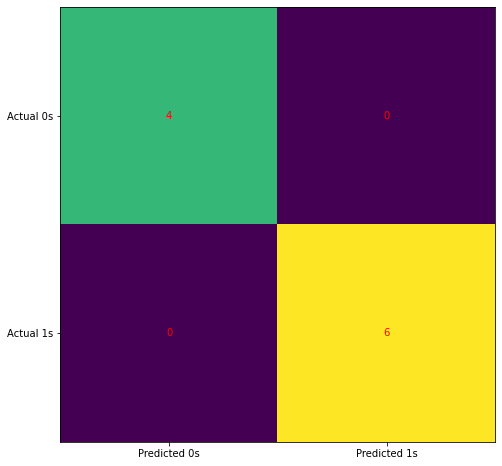

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='r')

plt.show()

In [25]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         7

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [29]:
#bisa untuk custom parameter 
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0, max_iter=10)
model.fit(x, y)

LogisticRegression(C=10.0, max_iter=10, random_state=0, solver='liblinear')

In [30]:
print(model.predict(x))

[0 0 0 1 1 1 1 1 1 1]


In [31]:
model.score(x, y)

1.0

In [32]:
# Example 2

# Step 1: Import packages, functions, and classes
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Get data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

# Step 3: Create a model and train it
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

# Step 4: Evaluate the model
p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

In [33]:
# Example 3

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
#load digits untuk nilai tuble input
x, y = load_digits(return_X_y=True)

In [35]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [36]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [37]:
#salah satu cara membagi set dg split test size 0.2 (20 persen)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [38]:
#scale data 
scaler = StandardScaler()                   #untuk algorithm berjalan better
X_train = scaler.fit_transform(X_train)     #menyesuaikan dg scaler 

In [42]:
#build model 
model = LogisticRegression(solver='lbfgs', multi_class='ovr')

In [43]:
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [44]:
#data test di sesuikan dg scaler
X_test = scaler.fit_transform(X_test)

In [45]:
y_pred = model.predict(X_test)

In [47]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  1,  0,  1,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0, 39,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0, 37,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  0, 38]])

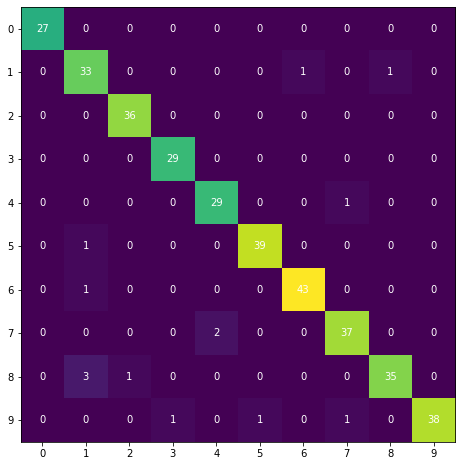

In [48]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))

for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='w')

plt.show()

In [49]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.87      0.94      0.90        35
           2       0.97      1.00      0.99        36
           3       0.97      1.00      0.98        29
           4       0.94      0.97      0.95        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.95      0.95      0.95        39
           8       0.97      0.90      0.93        39
           9       1.00      0.93      0.96        41

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



## KNN

In [73]:
# Assigning features and label variables

# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']

# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [74]:
from sklearn import preprocessing

In [75]:
le = preprocessing.LabelEncoder()

In [76]:
weather_encoded = le.fit_transform(weather)
weather_encoded

array([2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1])

In [79]:
temp_encoded = le.fit_transform(temp)

label = le.fit_transform(play)
temp_encoded

array([1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2])

In [80]:
features = list(zip(weather_encoded, temp_encoded))

print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [81]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(features, label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [82]:
model.score(features, label)

0.7142857142857143

In [83]:
model.predict([[0, 2]])

array([1])

In [84]:
# KNN With Multiple Labels

In [85]:
from sklearn import datasets

wine = datasets.load_wine()

In [87]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [88]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [89]:
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [90]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [92]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

In [93]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [94]:
from sklearn import metrics

In [95]:
metrics.accuracy_score(y_test, y_pred)

0.7037037037037037

In [96]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [97]:
metrics.accuracy_score(y_test, y_pred)

0.7407407407407407

In [98]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

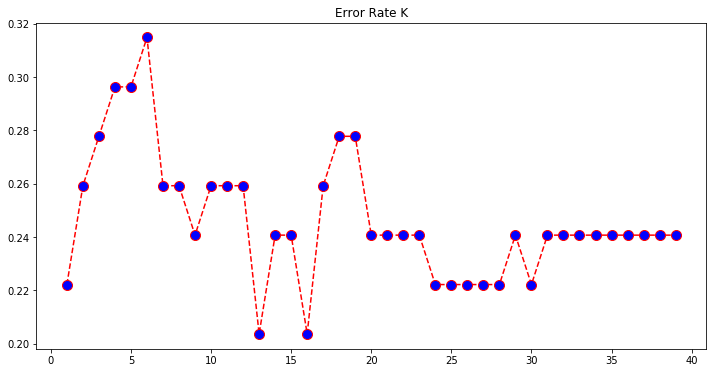

In [106]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='r', linestyle='dashed', marker='o',
        markerfacecolor='b', markersize=10)

plt.title('Error Rate K')
plt.show()

In [107]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [108]:
metrics.accuracy_score(y_test, y_pred)

0.7962962962962963

In [110]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.6851851851851852